In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## Base values
##n_source_implant_energy = 130 keV
## pt_implant_energy = 300 keV
## time_gox = 60 min
## Vt_dose = 2e12 atom/cm^2
## n_source_implant_dose = 5e15
## pt_dose = 3e12



## TODO
## Compare and identify Ion/Ioff for various given Gox_time and Vt_dose []
## Retrieve most optimal high Ion/Off ratio and low Vt_Rolloff and VDibl []
## Retrieve Voltage vs Current data (to compare with that of data.xlsx) []
## After above, optimize based on n+ source and drain implant energy and dosage []
## After above, optimized based on PT implant energy and dosage []
## Report []

In [2]:
csv_data = pd.read_csv("EE4613_Assignment_Data.csv")
key = csv_data.loc[0].to_list()
csv_data.columns = key
csv_data.drop([0,1,2], axis = 0, inplace = True)
csv_data.reset_index(inplace = True)
for columns in csv_data:
    csv_data[columns] = csv_data[columns].apply(pd.to_numeric, errors = "ignore")

In [3]:
csv_data

,index,Parameter,Vt_dose,Bmax_act,Bsur_act,Time_gox,tox_gn,xj_nch,Bmax_nch,Bsur_nch,...,Ioffs,St0,Sts,Gms,Gds,Vdibl,Ronoff,Icrit,Av,dSt
0,3,Wafer 1,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,6.310000e-13,80.0,80.7,0.000040,0.000001,0.00154,1.990000e+08,2.720000e-08,27.60,0.8040
1,4,Wafer 2,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,1.420000e-12,79.9,80.3,0.000074,0.000004,0.00123,1.750000e+08,5.440000e-08,18.30,0.4000
2,5,Wafer 3,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,6.640000e-12,79.6,79.6,0.000148,0.000040,0.00138,8.360000e+07,1.290000e-07,3.71,0.0258
3,6,Wafer 4,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,1.320000e-11,79.2,79.0,0.000177,0.000051,0.00462,5.130000e+07,1.520000e-07,3.51,-0.3110
4,7,Wafer 5,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,...,4.220000e-11,78.6,77.4,0.000216,0.000059,0.01440,2.020000e+07,2.270000e-07,3.68,-1.4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,157,Wafer 156,8.000000e+12,7.520000e+17,7.800000e+16,120,0.047676,0.306405,2.090000e+17,2.980000e+16,...,1.920000e-14,186.0,188.0,0.000032,0.000004,0.04210,3.160000e+09,1.040000e-07,7.72,1.2400
155,158,Wafer 157,8.000000e+12,7.520000e+17,7.800000e+16,120,0.047676,0.306405,2.090000e+17,2.980000e+16,...,1.920000e-14,179.0,183.0,0.000044,0.000012,0.07920,4.990000e+09,1.620000e-07,3.55,2.1200
156,159,Wafer 158,8.000000e+12,7.520000e+17,7.800000e+16,120,0.047676,0.306405,2.090000e+17,2.980000e+16,...,1.930000e-14,184.0,175.0,0.000053,0.000013,0.16000,6.500000e+09,2.410000e-07,4.12,-5.0800
157,160,Wafer 159,8.000000e+12,7.520000e+17,7.800000e+16,120,0.047676,0.306405,2.090000e+17,2.980000e+16,...,1.950000e-14,183.0,171.0,0.000057,0.000017,0.29000,7.770000e+09,3.230000e-07,3.35,-6.3800


In [8]:
csv_data["OnOffRatio"] = csv_data["Ion"]/csv_data["Ioffs"]
csv_data["OnOffRatio"]

0      1.996830e+08
1      1.760563e+08
2      8.358434e+07
3      5.113636e+07
4      2.016588e+07
           ...     
154    3.151042e+09
155    5.000000e+09
156    6.476684e+09
157    7.794872e+09
158    5.558376e+09
Name: OnOffRatio, Length: 159, dtype: float64

In [4]:
csv_data.drop("index", axis = 1, inplace = True)

In [5]:
vt_dose_data = csv_data["Vt_dose"].unique()
gox_time_data = csv_data["Time_gox"].unique()

csv_data.columns


Index(['Parameter', 'Vt_dose', 'Bmax_act', 'Bsur_act', 'Time_gox', 'tox_gn',
       'xj_nch', 'Bmax_nch', 'Bsur_nch', 'Lg', 'Vt0', 'Vts', 'Ion', 'Ioffs',
       'St0', 'Sts', 'Gms', 'Gds', 'Vdibl', 'Ronoff', 'Icrit', 'Av', 'dSt'],
      dtype='object')

In [6]:
lc_data = csv_data[csv_data["Lg"] == 10]
sc_data = csv_data[csv_data["Lg"] == 1]

In [16]:
lc_data = lc_data.drop(64)
lc_data.reset_index(inplace = True)
sc_data.reset_index(inplace = True)
lc_data = lc_data.drop("index", axis = 1)
sc_data = sc_data.drop("index", axis = 1)

In [17]:
lc_data

,Parameter,Vt_dose,Bmax_act,Bsur_act,Time_gox,tox_gn,xj_nch,Bmax_nch,Bsur_nch,Lg,...,Ioffs,St0,Sts,Gms,Gds,Vdibl,Ronoff,Icrit,Av,dSt
0,Wafer 1,2.000000e+12,1.880000e+17,1.950000e+16,10,0.010595,0.356951,1.020000e+17,1.830000e+16,10.0,...,6.310000e-13,80.0,80.7,0.000040,1.460000e-06,0.00154,1.990000e+08,2.720000e-08,27.6,0.8040
1,Wafer 9,2.000000e+12,1.880000e+17,1.950000e+16,30,0.019968,0.340180,9.840000e+16,1.330000e+16,10.0,...,3.310000e-14,94.6,94.2,0.000027,6.810000e-07,0.00335,2.060000e+09,2.010000e-08,39.7,-0.4330
2,Wafer 17,2.000000e+12,1.880000e+17,1.950000e+16,60,0.030253,0.318284,9.390000e+16,1.020000e+16,10.0,...,2.340000e-14,109.0,109.0,0.000018,3.580000e-07,0.00276,1.700000e+09,1.650000e-08,50.6,0.0378
3,Wafer 25,2.000000e+12,1.880000e+17,1.950000e+16,90,0.039254,0.313851,8.990000e+16,8.510000e+15,10.0,...,2.150000e-14,122.0,122.0,0.000013,2.780000e-07,0.00991,1.230000e+09,1.450000e-08,46.7,-0.0791
4,Wafer 33,2.000000e+12,1.880000e+17,1.950000e+16,120,0.047684,0.309289,8.630000e+16,7.490000e+15,10.0,...,1.910000e-14,135.0,135.0,0.000010,1.650000e-07,0.01470,1.000000e+09,1.360000e-08,60.8,-0.3270
5,Wafer 41,4.000000e+12,3.760000e+17,3.900000e+16,10,0.010595,0.355646,1.620000e+17,3.660000e+16,10.0,...,9.540000e-14,80.0,80.7,0.000034,9.570000e-07,-0.01460,1.090000e+09,2.820000e-08,35.7,0.8150
6,Wafer 49,4.000000e+12,3.760000e+17,3.900000e+16,30,0.019968,0.336026,1.440000e+17,2.650000e+16,10.0,...,2.360000e-14,106.0,105.0,0.000022,4.920000e-07,0.00335,2.200000e+09,2.140000e-08,44.1,-0.2280
7,Wafer 57,4.000000e+12,3.760000e+17,3.900000e+16,60,0.030252,0.318077,1.270000e+17,2.040000e+16,10.0,...,2.100000e-14,127.0,127.0,0.000013,2.020000e-07,0.01980,1.300000e+09,1.770000e-08,66.4,0.3390
8,Wafer 73,4.000000e+12,3.760000e+17,3.900000e+16,120,0.047681,0.308302,1.060000e+17,1.490000e+16,10.0,...,1.700000e-14,155.0,155.0,0.000007,7.550000e-08,0.02670,6.520000e+08,1.510000e-08,88.9,0.1880
9,Wafer 81,6.000000e+12,5.640000e+17,5.850000e+16,10,0.010594,0.354575,2.400000e+17,5.530000e+16,10.0,...,4.330000e-14,84.4,85.0,0.000031,4.570000e-07,-0.00628,2.170000e+09,2.890000e-08,67.7,0.8100


In [18]:
vt_rolloff = lc_data["Vt0"] - sc_data["Vt0"]

vt_ro_data = pd.DataFrame([sc_data["Vt_dose"], sc_data["Time_gox"], vt_rolloff])

#vt_rolloff
vt_ro_data = vt_ro_data.transpose()
constant_dose_vt_ro = vt_ro_data[vt_ro_data["Vt_dose"] == 2e+12]
constant_time_vt_ro = vt_ro_data[vt_ro_data["Time_gox"] == 60]


In [19]:
constant_dose_data = csv_data[csv_data["Vt_dose"] == 2.00E+12]
constant_time_data = csv_data[csv_data["Time_gox"] == 60]
constant_dose_data_lc = constant_dose_data[constant_dose_data["Lg"] == 10]
constant_dose_data_sc = constant_dose_data[constant_dose_data["Lg"] == 1]
constant_time_data_lc = constant_time_data[constant_time_data["Lg"] == 10]
constant_time_data_sc = constant_time_data[constant_time_data["Lg"] == 1]


In [20]:
def plot (x, y, line_of_best_fit,x_label, y_label, x_log, y_log, title, save_name):
    m,b = np.polyfit(np.array(x, dtype=float), np.array(y,dtype=float), 1)
    plt.style.use('seaborn-whitegrid')
    plt.plot(x,y, "-ok")
    if line_of_best_fit:
        plt.plot(x, m*x+b, "--", label = "Line of best fit")
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if x_log:
        plt.xscale("log")
    if y_log:
        plt.yscale("log")
    plt.title(title)
    plt.show()
    if save_name:
        plt.savefig(save_name + "png")
    return

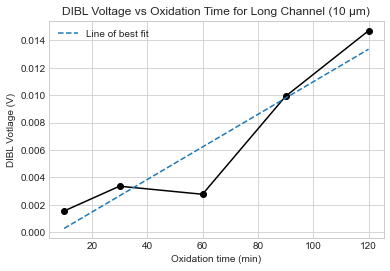

In [23]:
plot(constant_dose_data_lc["Time_gox"], constant_dose_data_lc["Vdibl"], True, "Oxidation time (min)", "DIBL Votlage (V)", False, False, "DIBL Voltage vs Oxidation Time for Long Channel (10 µm)", "")


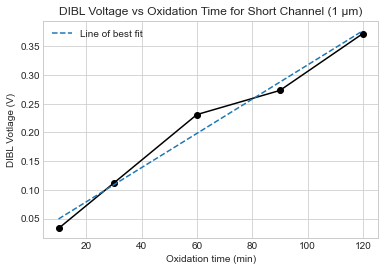

In [24]:
plot(constant_dose_data_sc["Time_gox"], constant_dose_data_sc["Vdibl"] , True, "Oxidation time (min)", "DIBL Votlage (V)", False, False, "DIBL Voltage vs Oxidation Time for Short Channel (1 µm)", "")

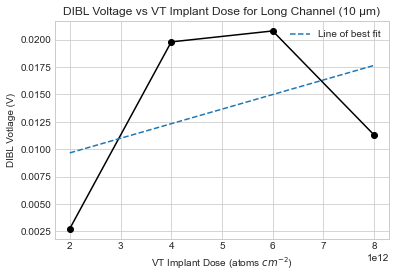

In [26]:
plot(constant_time_data_lc["Vt_dose"], constant_time_data_lc["Vdibl"], True, "VT Implant Dose (atoms $cm^{-2}$)", "DIBL Votlage (V)", False, False, "DIBL Voltage vs VT Implant Dose for Long Channel (10 µm)", "")


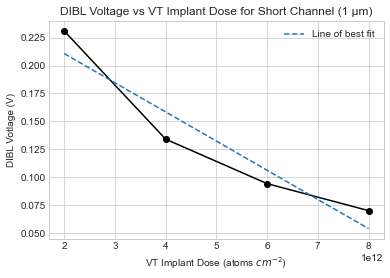

In [27]:
plot(constant_time_data_sc["Vt_dose"], constant_time_data_sc["Vdibl"], True, "VT Implant Dose (atoms $cm^{-2}$)", "DIBL Votlage (V)", False, False, "DIBL Voltage vs VT Implant Dose for Short Channel (1 µm)", "")


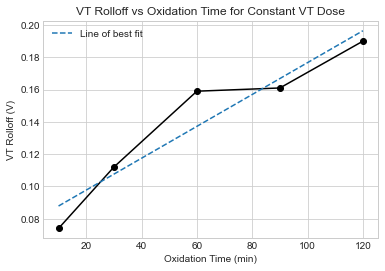

In [30]:
plot(constant_dose_vt_ro["Time_gox"], constant_dose_vt_ro["Vt0"], True, "Oxidation Time (min)", "VT Rolloff (V)", False, False, "VT Rolloff vs Oxidation Time for Constant VT Dose", "")


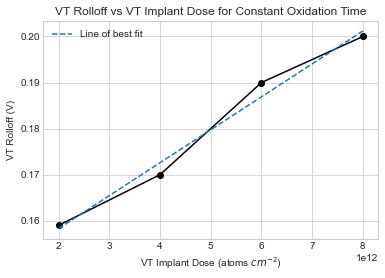

In [31]:
plot(constant_time_vt_ro["Vt_dose"], constant_time_vt_ro["Vt0"], True, "VT Implant Dose (atoms $cm^{-2}$)", "VT Rolloff (V)", False, False, "VT Rolloff vs VT Implant Dose for Constant Oxidation Time", "")


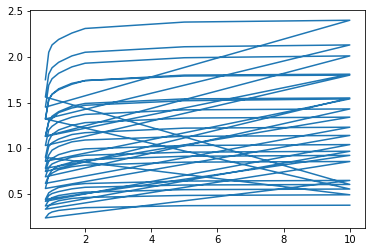

In [ ]:
plt.plot(csv_data["Lg"], csv_data["Vt0"])
plt.show()